# **Deep Learning**
**Se define como un algoritmo automático estructurado o jerárquico que emula el aprendizaje humano con el fin de obtener ciertos conocimientos. Destaca porque no requiere de reglas programadas previamente, sino que el propio sistema es capaz de «aprender» por sí mismo para efectuar una tarea a través de una fase previa de entrenamiento.**

**Sigue un proceso por capas que simula el funcionamiento básico del cerebro que se realiza a través de las redes de neuronas.**


# **1. Librerías**

In [1]:
import pandas as pd
import numpy as np
import io
import warnings
import matplotlib.pyplot as plt
import datetime
import sklearn.metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

%matplotlib inline
warnings.filterwarnings('ignore')

from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [24]:
from numpy.random import seed
seed(10)

In [ ]:
from decimal import Decimal, getcontext

getcontext().prec = 100000000

# **2. Datos**
Vamos a usar los datos que hemos usado en las asignaturas previas de este curso.

In [25]:
data = pd.read_csv('data/data.csv')
data = data.drop("reserverd/assigned", axis=1)
data.describe()

,Unnamed: 0,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,arrival_month,hotel_Resort Hotel,meal_FB,meal_HB,meal_SC,meal_Undefined,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient-Party
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,14999.500000,0.368367,8.280793,2016.156167,27.144700,15.785733,0.928400,2.51210,1.863632,0.106705,...,6.547933,0.340633,0.006100,0.122200,0.090733,0.009367,0.120433,0.001200,0.004733,0.960500
std,8660.398374,0.482370,2.027570,0.706490,13.649126,8.800606,1.004709,1.92888,0.635565,0.403716,...,3.099756,0.473930,0.077865,0.327522,0.287234,0.096329,0.325473,0.034621,0.068637,0.194785
min,0.000000,0.000000,0.763433,2015.000000,1.000000,1.000000,0.000000,0.00000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7499.750000,0.000000,7.664083,2016.000000,16.000000,8.000000,0.000000,1.00000,2.000000,0.000000,...,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,14999.500000,0.000000,8.326678,2016.000000,27.000000,16.000000,1.000000,2.00000,2.000000,0.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,22499.250000,1.000000,9.003887,2017.000000,38.000000,23.000000,2.000000,3.00000,2.000000,0.000000,...,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,29999.000000,1.000000,17.690502,2017.000000,53.000000,31.000000,19.000000,50.00000,55.000000,3.000000,...,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
data.head()

,Unnamed: 0,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,arrival_month,hotel_Resort Hotel,meal_FB,meal_HB,meal_SC,meal_Undefined,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient-Party
0,0,0.0,13.077658,2015.0,27.0,1.0,2.0,5.0,2.0,0.0,...,7.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1.0,7.389493,2015.0,27.0,1.0,0.0,2.0,2.0,0.0,...,7.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,0.0,7.755577,2015.0,27.0,1.0,0.0,2.0,1.0,0.0,...,7.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,0.0,13.077658,2015.0,27.0,1.0,0.0,4.0,2.0,0.0,...,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,1.0,7.389493,2015.0,27.0,1.0,0.0,2.0,2.0,0.0,...,7.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


## Variable Objetivo: is_canceled
Nos vamos a centrar en la variable is_canceled, con la intención de predecir si una reserva será cancelada o no.

In [27]:
X = data.iloc[:,2:29].values
Y = data.iloc[:,1:2].values

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [29]:
print(X.shape)
print(Y.shape)

(30000, 27)
(30000, 1)


In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
print('Train', X_train.shape, Y_train.shape)
print('Test', X_test.shape, Y_test.shape)

Train (20100, 27) (20100, 1)
Test (9900, 27) (9900, 1)


In [31]:
epochs = 50
batch_size = 50

# **3. Red Monocapa**
**Las redes monocapa son redes con una sola capa.Para unirse las neuronas crean conexiones laterales para conectar con otras neuronas de su capa.**

**Las redes más representativas son la red de Hopfield, la red BRAIN-STATE-IN-A-BOX o memoria asociativa y las maquinas estocásticas de Botzmann y Cauchy.**

**Entre las redes neuronales monocapa, existen algunas que permiten que las neuronas tengan conexiones a si mismas y se denominan autorecurrentes.**

Primero vamos a realizar una primera prueba simple con unsa sola capa, y un número de nodos aleatorio.

Después iremos comprobando cual es el mejor número de capas y el mejor número de nodos por capa.

Creamos una primera capa con un número de nodos equivalente a la dimensión de los datos y una capa final con un nodo, pues estamos en un problema de clasificación

In [32]:
from keras.models import Sequential
model = Sequential()
model.add(Dense(28, input_dim=27, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [33]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['BinaryAccuracy'])

In [34]:
history = model.fit(X_train, Y_train, validation_data = (X_test,Y_test), epochs=epochs, batch_size=batch_size, verbose = 0)

In [35]:
y_pred = model.predict(X_test, batch_size=batch_size, verbose=1)
y_pred = [0 if i < 0.5 else 1 for i in y_pred]
confusion_matrix(Y_test, y_pred)

198/198 [==============================] - 0s 859us/step


array([[6190,  108],
       [ 247, 3355]])

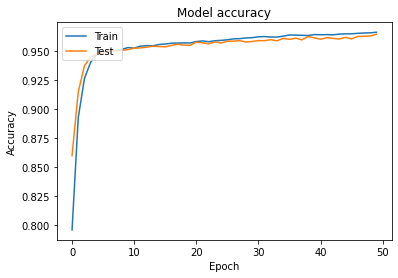

In [36]:
import matplotlib.pyplot as plt
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

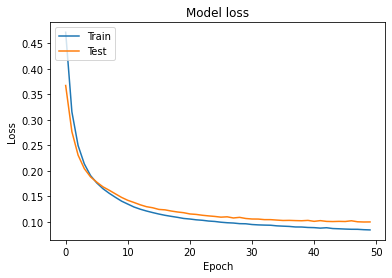

In [37]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

Como podemos ver, se optiene un accuracy muy bueno con algo muy simple.
Esto puede deberse a que los datos estén desbalanceados.

In [38]:
data["is_canceled"].value_counts()

0.0    18949
1.0    11051
Name: is_canceled, dtype: int64

In [39]:
print("0: {}%".format((18949/30000)*100))
print("1: {}%".format((11051/30000)*100))


0: 63.16333333333334%
1: 36.836666666666666%


No es que sean unos datos muy desbalanceados, pero vamos a añadir mas métricas para evaluar mejor el modelo (Recall y Precision)

# **4. Nodos primera capa**
Después de una primera prueba muy simple inicial, vamos a probar con distinto número de nodos en la primera capa.

In [44]:
def find_nodes(input_dim, max_nodes, epochs, batch_size):
    """Create Neural Network with with two lstm layers with sizes i, j"""

    loss_array = []
    accuracy_array = []
    recall_array = []
    precision_array = []
    fscore_array = []
    
    model = Sequential()
    
    best_num_nodes = 0
    best_fscore = 0
    
    max_nodes = np.linspace(10, int(max_nodes), int(max_nodes/10))
    for nodes in np.nditer(max_nodes):
        print("################################################################################################")
        print("#################################### Working with {} nodes #####################################".format(int(nodes)))
        
        model.add(Dense(int(nodes), input_dim=input_dim, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['BinaryAccuracy', 'Recall', 'Precision'])
        model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, verbose = 0)
        
        loss, accuracy, recall, precision = model.evaluate(X_test, Y_test)
        accuracy = accuracy * 100
        recall = recall * 100
        precision = precision * 100
        if recall+precision == 0:
            fscore = 0
        else:
            fscore = (2*(recall*precision))/(recall+precision) 
        
        loss_array.append(loss)
        accuracy_array.append(accuracy)
        recall_array.append(recall)
        precision_array.append(precision)
        fscore_array.append(fscore)
        
        print('Loss for {} nodes: {}'.format(int(nodes), loss))
        print('Accuracy for {} nodes: {}'.format(int(nodes), accuracy))
        print('Recall for {} nodes: {}'.format(int(nodes), recall))
        print('Precision for {} nodes: {}'.format(int(nodes), precision))
        print('F1-score for {} nodes: {}'.format(int(nodes), fscore))
        
        if fscore > best_fscore:
            best_num_nodes = nodes
            best_fscore = fscore
        
    print("La mejor configuración encontrada (fscore: {}) se ha dado con {} nodos".format(best_fscore, int(best_num_nodes)))
    
    return max_nodes, loss_array, accuracy_array, recall_array, precision_array, fscore_array

In [45]:
nodes, loss_array, accuracy_array, recall_array, precision_array, fscore_array = find_nodes(27, 100, epochs, batch_size)

################################################################################################
#################################### Working with 10 nodes #####################################
310/310 [==============================] - 1s 897us/step - loss: 0.1094 - binary_accuracy: 0.9567 - recall: 0.9139 - precision: 0.9651
Loss for 10 nodes: 0.10943744331598282
Accuracy for 10 nodes: 95.6666648387909
Recall for 10 nodes: 91.39366745948792
Precision for 10 nodes: 96.51128649711609
F1-score for 10 nodes: 93.88278742498575
################################################################################################
#################################### Working with 20 nodes #####################################
310/310 [==============================] - 1s 1ms/step - loss: 0.1032 - binary_accuracy: 0.9613 - recall: 0.9398 - precision: 0.9533
Loss for 20 nodes: 0.10322381556034088
Accuracy for 20 nodes: 96.13131284713745
Recall for 20 nodes: 93.97556781768799
Precision for 20 nodes: 

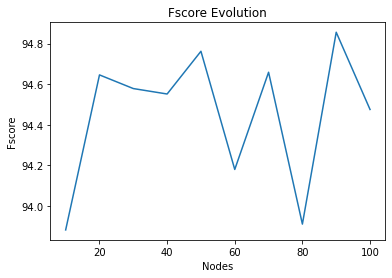

In [46]:
plt.plot(nodes, fscore_array)
plt.title('Fscore Evolution')
plt.ylabel('Fscore')
plt.xlabel('Nodes')
plt.show()

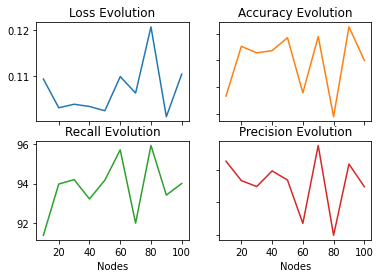

In [47]:
fig, axs = plt.subplots(2, 2)

axs[0, 0].plot(nodes, loss_array)
axs[0, 0].set_title('Loss Evolution')
axs[0, 0].set(xlabel='Nodes')

axs[0, 1].plot(nodes, accuracy_array, 'tab:orange')
axs[0, 1].set_title('Accuracy Evolution')
axs[0, 1].set(xlabel='Nodes')

axs[1, 0].plot(nodes, recall_array, 'tab:green')
axs[1, 0].set_title('Recall Evolution')
axs[1, 0].set(xlabel='Nodes')

axs[1, 1].plot(nodes, precision_array, 'tab:red')
axs[1, 1].set_title('Precision Evolution')
axs[1, 1].set(xlabel='Nodes')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

En general, seguimos obteniendo buenos resultados con las nuevas métricas.

Nos vamos a quedar con XXX nodos en la primera capa, y ahora vamos a probar cual es el mejor número de capas.

# **5. Número de capas**
Vamos a buscar el mejor número de capas para nuestro modelo

In [48]:
def create_model(nodes_per_layer, input_dim, hidden_layers):
    """Create Neural Network with with two lstm layers with sizes i, j"""
    
    model = Sequential()
    model.add(Dense(90, input_dim=input_dim, activation='relu'))
    
    hidden_layers = np.linspace(1, int(hidden_layers), int(hidden_layers))
    for layer in np.nditer(hidden_layers):
        model.add(Dense(int(nodes_per_layer), activation='relu'))
    
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['BinaryAccuracy', 'Recall', 'Precision'])
    return model

def find_num_layers(nodes_per_layer, input_dim, max_layers, epochs, batch_size):
    best_num_layers = 0
    best_fscore = 0
    
    loss_array = []
    accuracy_array = []
    recall_array = []
    precision_array = []
    fscore_array = []
    
    layers = np.linspace(1, max_layers-1, max_layers-1)
    for hidden_layers in np.nditer(layers):
        print("################################################################################################")
        print("#################################### Working with {} layers #####################################".format(int(hidden_layers+1)))
        model = create_model(nodes_per_layer, input_dim, hidden_layers)
        model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, verbose = 0)
        
        loss, accuracy, recall, precision = model.evaluate(X_test, Y_test)
        accuracy = accuracy * 100
        recall = recall * 100
        precision = precision * 100
        fscore = (2*(recall*precision))/(recall+precision)
        
        loss_array.append(loss)
        accuracy_array.append(accuracy)
        recall_array.append(recall)
        precision_array.append(precision)
        fscore_array.append(fscore)
        
        if fscore > best_fscore:
            best_num_layers = hidden_layers
            best_fscore = fscore
        
        print('Loss for {} layers: {}'.format(int(hidden_layers), loss))
        print('Accuracy for {} layers: {}'.format(int(hidden_layers), accuracy))
        print('Recall for {} layers: {}'.format(int(hidden_layers), recall))
        print('Precision for {} layers: {}'.format(int(hidden_layers), precision))
        print('F1-score for {} layers: {}'.format(int(hidden_layers), fscore))
        
    print("La mejor configuración encontrada (fscore: {}) se ha dado con {} capas".format(best_fscore, int(best_num_layers+1)))
    
    return layers, loss_array, accuracy_array, recall_array, precision_array, fscore_array

In [49]:
layers, loss_array_layers, accuracy_array_layers, recall_array_layers, precision_array_layers, fscore_array_layers = find_num_layers(20, 27, 10, epochs, batch_size)

################################################################################################
#################################### Working with 2 layers #####################################
310/310 [==============================] - 1s 1ms/step - loss: 0.1123 - binary_accuracy: 0.9595 - recall: 0.9448 - precision: 0.9440
Loss for 1 layers: 0.11230367422103882
Accuracy for 1 layers: 95.9494948387146
Recall for 1 layers: 94.47529315948486
Precision for 1 layers: 94.39666867256165
F1-score for 1 layers: 94.43596455094216
################################################################################################
#################################### Working with 3 layers #####################################
310/310 [==============================] - 1s 1ms/step - loss: 0.1310 - binary_accuracy: 0.9615 - recall: 0.9511 - precision: 0.9435
Loss for 2 layers: 0.130961611866951
Accuracy for 2 layers: 96.15151286125183
Recall for 2 layers: 95.11382579803467
Precision for 2 layers: 94.3

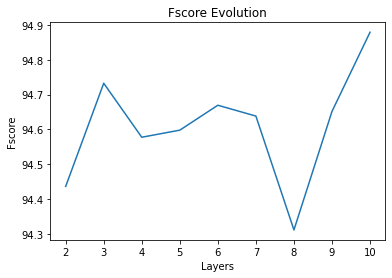

In [50]:
plt.plot(layers+1,fscore_array_layers)
plt.title('Fscore Evolution')
plt.ylabel('Fscore')
plt.xlabel('Layers')
plt.show()

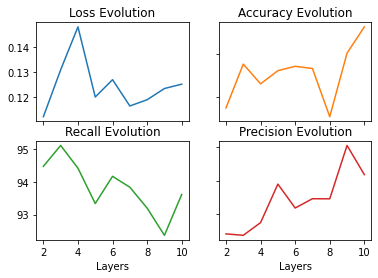

In [51]:
fig, axs = plt.subplots(2, 2)

axs[0, 0].plot(layers+1, loss_array_layers)
axs[0, 0].set_title('Loss Evolution')
axs[0, 0].set(xlabel='Layers')

axs[0, 1].plot(layers+1, accuracy_array_layers, 'tab:orange')
axs[0, 1].set_title('Accuracy Evolution')
axs[0, 1].set(xlabel='Layers')

axs[1, 0].plot(layers+1, recall_array_layers, 'tab:green')
axs[1, 0].set_title('Recall Evolution')
axs[1, 0].set(xlabel='Layers')

axs[1, 1].plot(layers+1, precision_array_layers, 'tab:red')
axs[1, 1].set_title('Precision Evolution')
axs[1, 1].set(xlabel='Layers')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

Podemos ver que los mejores resultados se dan con 7 capas.

# **6. Nodos por capa**

In [52]:
def find_nodes_per_layer(max_nodes_per_layer, input_dim, hidden_layers, epochs, batch_size):
    best_num_nodes = 0
    best_fscore = 0
    
    loss_array = []
    accuracy_array = []
    recall_array = []
    precision_array = []
    fscore_array = []
    
    max_nodes_per_layer = np.linspace(50, max_nodes_per_layer, int(max_nodes_per_layer/50))
    print(max_nodes_per_layer)
    for nodes in np.nditer(max_nodes_per_layer):
        print("################################################################################################")
        print("#################################### Working with {} nodes #####################################".format(int(nodes)))
        model = create_model(nodes, input_dim, hidden_layers)
        model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, verbose = 0)
        
        loss, accuracy, recall, precision = model.evaluate(X_test, Y_test)
        accuracy = accuracy * 100
        recall = recall * 100
        precision = precision * 100
        fscore = (2*(recall*precision))/(recall+precision)
        
        loss_array.append(loss)
        accuracy_array.append(accuracy)
        recall_array.append(recall)
        precision_array.append(precision)
        fscore_array.append(fscore)
        
        if accuracy > best_fscore:
            best_num_nodes = nodes
            best_fscore = fscore
        
        print('Loss for {} nodes and {} layers: {}'.format(int(nodes), loss, int(hidden_layers+1)))
        print('Accuracy for {} nodes and {} layers: {}'.format(int(nodes), accuracy, int(hidden_layers+1)))
        print('Recall for {} nodes and {} layers: {}'.format(int(nodes), recall, int(hidden_layers+1)))
        print('Precision for {} nodes and {} layers: {}'.format(int(nodes), precision, int(hidden_layers+1)))
        print('F1-score for {} nodes and {} layers: {}'.format(int(nodes), fscore, int(hidden_layers+1)))

        print("La mejor configuración encontrada (fscore: {}) se ha dado con {} nodeos y {} capas".format(best_fscore, int(best_num_nodes), int(hidden_layers+1)))
    
    return max_nodes_per_layer, loss_array, accuracy_array, recall_array, precision_array, fscore_array

In [53]:
nodes, loss_array_nodes, accuracy_array_nodes, recall_array_nodes, precision_array_nodes, fscore_array_nodes = find_nodes_per_layer(250, 27, 9, epochs, batch_size)


[ 50. 100. 150. 200. 250.]
################################################################################################
#################################### Working with 50 nodes #####################################
310/310 [==============================] - 1s 1ms/step - loss: 0.1480 - binary_accuracy: 0.9597 - recall: 0.9378 - precision: 0.9507
Loss for 50 nodes and 0.1480143666267395 layers: 10
Accuracy for 50 nodes and 95.96969485282898 layers: 10
Recall for 50 nodes and 93.7812328338623 layers: 10
Precision for 50 nodes and 95.07458209991455 layers: 10
F1-score for 50 nodes and 94.4234788176446 layers: 10
La mejor configuración encontrada (fscore: 94.4234788176446) se ha dado con 50 nodeos y 10 capas
################################################################################################
#################################### Working with 100 nodes #####################################
310/310 [==============================] - 1s 1ms/step - loss: 0.2040 - binary_accura

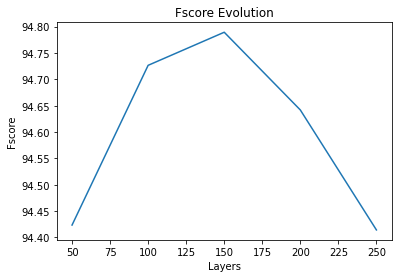

In [54]:
plt.plot(nodes,fscore_array_nodes)
plt.title('Fscore Evolution')
plt.ylabel('Fscore')
plt.xlabel('Layers')
plt.show()

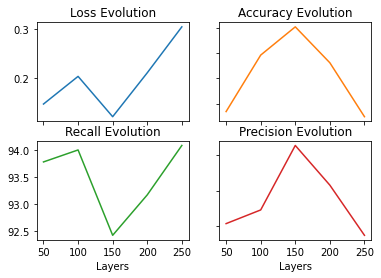

In [55]:
fig, axs = plt.subplots(2, 2)

axs[0, 0].plot(nodes, loss_array_nodes)
axs[0, 0].set_title('Loss Evolution')
axs[0, 0].set(xlabel='Layers')

axs[0, 1].plot(nodes, accuracy_array_nodes, 'tab:orange')
axs[0, 1].set_title('Accuracy Evolution')
axs[0, 1].set(xlabel='Layers')

axs[1, 0].plot(nodes, recall_array_nodes, 'tab:green')
axs[1, 0].set_title('Recall Evolution')
axs[1, 0].set(xlabel='Layers')

axs[1, 1].plot(nodes, precision_array_nodes, 'tab:red')
axs[1, 1].set_title('Precision Evolution')
axs[1, 1].set(xlabel='Layers')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

Con esta última prueba no se ha mejorado lo anterior.

La mejor configuración que tenemos es con 10 capas, 90 nodos en la primera capa y 20 en las demás.

# **7. Dropout**

In [56]:
def create_model_hyp(nodes_per_layer, input_dim, hidden_layers, dropout):
    """Create Neural Network with with two lstm layers with sizes i, j"""
    
    model = Sequential()
    model.add(Dense(90, input_dim=input_dim, activation='relu'))
    
    hidden_layers = np.linspace(1, int(hidden_layers), int(hidden_layers))
    for layer in np.nditer(hidden_layers):
        model.add(Dense(int(nodes_per_layer), activation='relu'))
        model.add(Dropout(dropout))
    
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['BinaryAccuracy', 'Recall', 'Precision'])
    return model

def find_dropout(nodes_per_layer, input_dim, hidden_layers, epochs, batch_size):
    dropout_array = [0.001, 0.0025, 0.005, 0.01, 0.02, 0.05, 0.1, 0.25, 0.5]

    best_dropout = 0
    best_fscore = 0
    
    loss_array = []
    accuracy_array = []
    recall_array = []
    precision_array = []
    fscore_array = []
    
    for dropout in dropout_array:        
        print("################################################################################################")
        print("#################################### Working with dropout {} #####################################".format(dropout))
        model = create_model_hyp(nodes_per_layer, input_dim, hidden_layers, dropout)
        model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, verbose = 0)
        
        loss, accuracy, recall, precision = model.evaluate(X_test, Y_test)
        accuracy = accuracy * 100
        recall = recall * 100
        precision = precision * 100
        fscore = (2*(recall*precision))/(recall+precision)
        
        loss_array.append(loss)
        accuracy_array.append(accuracy)
        recall_array.append(recall)
        precision_array.append(precision)
        fscore_array.append(fscore)
        
        if fscore > best_fscore:
            best_dropout = dropout
            best_fscore = fscore
        
        print('Loss for dropout {}: {}'.format(dropout, loss))
        print('Accuracy for dropout {}: {}'.format(dropout, accuracy))
        print('Recall for dropout {}: {}'.format(dropout, recall))
        print('Precision for dropout {}: {}'.format(dropout, precision))
        print('F1-score for dropout {}: {}'.format(dropout, fscore))

    print("La mejor configuración encontrada (fscore: {}) se ha dado con dropout {}".format(best_fscore, best_dropout))
    
    return dropout_array, loss_array, accuracy_array, recall_array, precision_array, fscore_array

In [57]:
dropout_array, loss_array, accuracy_array, recall_array, precision_array, fscore_array = find_dropout(20, 27, 9, epochs, batch_size)

################################################################################################
#################################### Working with dropout 0.001 #####################################
310/310 [==============================] - 2s 1ms/step - loss: 0.1124 - binary_accuracy: 0.9627 - recall: 0.9328 - precision: 0.9636
Loss for dropout 0.001: 0.11236675828695297
Accuracy for dropout 0.001: 96.27272486686707
Recall for dropout 0.001: 93.28150749206543
Precision for dropout 0.001: 96.3578999042511
F1-score for dropout 0.001: 94.79475057685376
################################################################################################
#################################### Working with dropout 0.0025 #####################################
310/310 [==============================] - 1s 1ms/step - loss: 0.1403 - binary_accuracy: 0.9568 - recall: 0.9517 - precision: 0.9310
Loss for dropout 0.0025: 0.14032311737537384
Accuracy for dropout 0.0025: 95.67676782608032
Recall for dropou

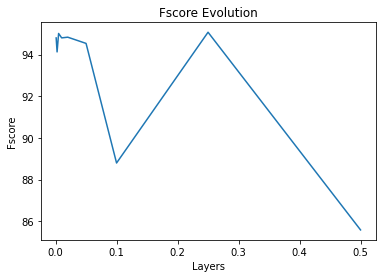

In [58]:
plt.plot(dropout_array,fscore_array)
plt.title('Fscore Evolution')
plt.ylabel('Fscore')
plt.xlabel('Layers')
plt.show()

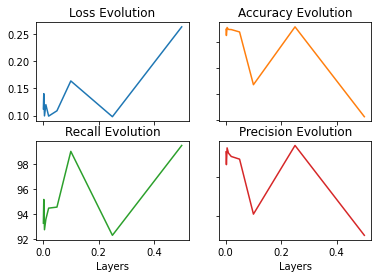

In [59]:
fig, axs = plt.subplots(2, 2)

axs[0, 0].plot(dropout_array, loss_array)
axs[0, 0].set_title('Loss Evolution')
axs[0, 0].set(xlabel='Layers')

axs[0, 1].plot(dropout_array, accuracy_array, 'tab:orange')
axs[0, 1].set_title('Accuracy Evolution')
axs[0, 1].set(xlabel='Layers')

axs[1, 0].plot(dropout_array, recall_array, 'tab:green')
axs[1, 0].set_title('Recall Evolution')
axs[1, 0].set(xlabel='Layers')

axs[1, 1].plot(dropout_array, precision_array, 'tab:red')
axs[1, 1].set_title('Precision Evolution')
axs[1, 1].set(xlabel='Layers')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

# **8. Resultados**
Aunque todos los resultados obtenidos son muy parecidos, el mejor de todos (fscore 95.38) se ha dado con 10 capas, 90 nodos en la primera capa y 20 en las demás, y dropout 0.05

In [62]:
model = create_model_hyp(90, 27, 9, 0.25)
model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, verbose = 0)

loss, accuracy, recall, precision = model.evaluate(X_test, Y_test)
accuracy = accuracy * 100
recall = recall * 100
precision = precision * 100
fscore = (2*(recall*precision))/(recall+precision)

print('Loss: {}'.format(loss))
print('Accuracy: {}'.format(accuracy))
print('Recall: {}'.format(recall))
print('Precision: {}'.format(precision))
print('F1-score: {}'.format(fscore))

310/310 [==============================] - 2s 1ms/step - loss: 0.1156 - binary_accuracy: 0.9665 - recall: 0.9367 - precision: 0.9701
Loss: 0.11558783799409866
Accuracy: 96.6464638710022
Recall: 93.67018342018127
Precision: 97.00977802276611
F1-score: 95.31073566597543


In [63]:
y_pred = model.predict(X_test, batch_size=batch_size, verbose=1)
y_pred = [0 if i < 0.5 else 1 for i in y_pred]
confusion_matrix(Y_test, y_pred)

198/198 [==============================] - 1s 1ms/step


array([[6194,  104],
       [ 228, 3374]])